In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../data/08/CarPrice_Assignment.csv')

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
cols = df.select_dtypes(include=["object"]).columns
for col in cols:
    display(df[col].value_counts())

CarName
peugeot 504                 6
toyota corolla              6
toyota corona               6
subaru dl                   4
mitsubishi outlander        3
                           ..
volkswagen super beetle     1
volkswagen rabbit custom    1
volvo 245                   1
volvo diesel                1
volvo 246                   1
Name: count, Length: 147, dtype: int64

fueltype
gas       185
diesel     20
Name: count, dtype: int64

aspiration
std      168
turbo     37
Name: count, dtype: int64

doornumber
four    115
two      90
Name: count, dtype: int64

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

enginelocation
front    202
rear       3
Name: count, dtype: int64

enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

cylindernumber
four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: count, dtype: int64

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

In [6]:
df = pd.get_dummies(df, columns=cols, drop_first=True).astype(int)

df.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88,168,64,48,2548,130,3,2,...,0,0,0,0,0,0,0,1,0,0
1,2,3,88,168,64,48,2548,130,3,2,...,0,0,0,0,0,0,0,1,0,0
2,3,1,94,171,65,52,2823,152,2,3,...,0,0,0,0,0,0,0,1,0,0
3,4,2,99,176,66,54,2337,109,3,3,...,0,0,0,0,0,0,0,1,0,0
4,5,2,99,176,66,54,2824,136,3,3,...,0,0,0,0,0,0,0,1,0,0


In [7]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Accuracy:  0.0
R2 Score:  -1.502381359967098


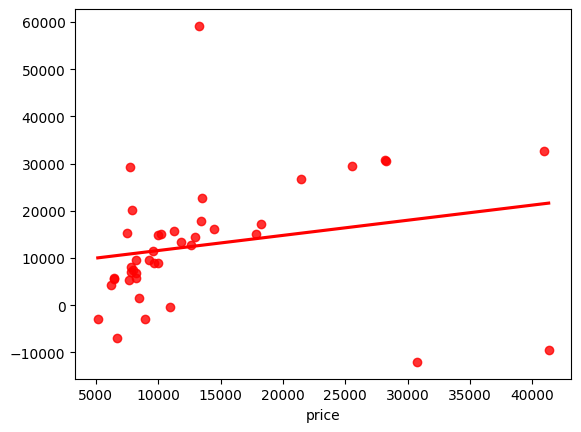

In [9]:
y_pred = lr.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred.round()))
print("R2 Score: ", r2_score(y_test, y_pred))

sns.regplot(x=y_test, y=y_pred, ci=None, color='red')
plt.show()

In [10]:
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_transformed = poly.fit_transform(X_train)
X_test_transformed = poly.transform(X_test)

lr.fit(X_train_transformed, y_train)
y_pred_poly = lr.predict(X_test_transformed)
print("Accuracy (Polynomial): ", accuracy_score(y_test, y_pred_poly.round()))
print("R2 Score (Polynomial): ", r2_score(y_test, y_pred_poly))

Accuracy (Polynomial):  0.0
R2 Score (Polynomial):  0.5293135772444283


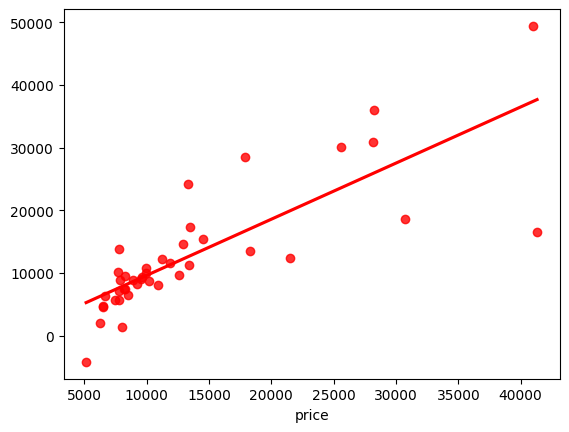

In [11]:
sns.regplot(x=y_test, y=y_pred_poly, ci=None, color='red')
plt.show()